# Step-1: read the data sets in JSON format one by one

1. First find the  useful field that needs to be extracted, and create an extraction function.

2. It should be noted that because a single file is too large, it cannot be read at once (memory error), and can only be extracted separately and then merged.

3. Save the extracted JSON data as a PKL file for easy reading next time.

In [2]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir(r'D:\dataset\2020-01-08 to 2020-01-14')

In [10]:
#create funcation for loads JSON files
def data_load(JSON):
   #read each line of the file, extract relevant data to analysis
    with open(JSON, "r") as f:
        for line in f:
            
            data = json.loads(line)

            #infor for this tweet
            tweet_id = data['id_str']

            tweet_lang = data['lang']

            tweet_time =data['created_at_src']

            #tweet_favorite_count = data['favorite_count']

            #infor from who tweet this tweet
            
            user_id = data['user']['id']

            user_location = data['user']['location']

            user_friends_count = data['user']['friends_count']

            user_favourites_count = data['user']['favourites_count']

            user_followers_count = data['user']['followers_count']

            #retweet = data['retweet_count']

            # Extraction of important information
            if 'extended_tweet' in data:
                text = data['extended_tweet']['full_text']
            else:
                text = data['text']

            try:
                url = data['entities']['urls'][0]['expanded_url']
                classification =data['entities']['classification']  
                sentiment = data['entities']['sentiment']
                swearword = data['entities']['swearword']
            except:
                url = None
                classification = None
                sentiment = None
                swearword = None    
            rows.append((tweet_id,tweet_lang,tweet_time,user_id,user_location,
                         user_friends_count,user_favourites_count,user_followers_count, 
                         text,url,classification,sentiment,swearword))

In [11]:
#Convert rows to DataFrame
def data_tofile(file):
    data_load(file)
    df= pd.DataFrame(data=rows, columns=['tweet_id','tweet_lang','tweet_time','user_id','user_location',
         'user_friends_count','user_favourites_count','user_followers_count', 
         'text','url','classification','sentiment','swearword'])

    #save as file
    df.to_pickle(file+'.pkl')

In [12]:
#Create a list of JSON files
JSON = ['2020-01-08.json','2020-01-09.json','2020-01-10.json','2020-01-11.json','2020-01-12.json','2020-01-13.json',
        '2020-01-14.json']

In [14]:
#Extract each JSON file using a loop
for i in JSON:
    rows=[]
    data_tofile(i)

# Step-2 Data preprocessing and cleaning

1. Combine PKL data into a DataFrame.

2. Pre-process the data and perform some necessary cleaning.

In [65]:
#Define the target file path
import glob
path = r'D:\dataset\2020-01-08 to 2020-01-14'
Files = glob.glob(path + "/*.pkl")

In [67]:
#Merge all PKL files
data_01 = []

for files in Files:
    df = pd.read_pickle(files)
    data_01.append(df)

data = pd.concat(data_01, ignore_index=True,axis=0)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733047 entries, 0 to 1733046
Data columns (total 13 columns):
tweet_id                 object
tweet_lang               object
tweet_time               object
user_id                  int64
user_location            object
user_friends_count       int64
user_favourites_count    int64
user_followers_count     int64
text                     object
url                      object
classification           object
sentiment                object
swearword                object
dtypes: int64(4), object(9)
memory usage: 171.9+ MB


In [69]:
data.head(5)

,tweet_id,tweet_lang,tweet_time,user_id,user_location,user_friends_count,user_favourites_count,user_followers_count,text,url,classification,sentiment,swearword
0,1215055926136377349,en,Wed Jan 08 23:41:22 +0000 2020,96691465,United States,1465,27440,594,RT @cjtruth: Do not force those not yet ready....,None,None,None,None
1,1215055926958481413,en,Wed Jan 08 23:41:22 +0000 2020,859592034,"New Hampshire, USA",55470,64401,55298,RT @weightman_gary3: They are LOL closing in o...,None,None,None,None
2,1215055927264436224,en,Wed Jan 08 23:41:22 +0000 2020,800159623617490944,she/her,104,50239,88,RT @Louis_Allday: Anyone who is surprised that...,None,None,None,None
3,1215055922948530179,en,Wed Jan 08 23:41:21 +0000 2020,2515385400,Sydney,41,54,7,@matthewfsmith Another propaganda from @matthe...,https://twitter.com/i/web/status/1215055922948...,"[{'score': 1, 'id': 'anger_cascading_naive-bay...",{'probabilities': {'Very positive': 0.00784774...,[]
4,1215055922634141697,en,Wed Jan 08 23:41:21 +0000 2020,3041722431,None,2578,49762,2290,RT @catturd2: Good morning to everyone except ...,None,None,None,None


In [70]:
data.tweet_lang.value_counts()

en     1477485
pt       89232
es       63451
tl       13387
it       11788
th       11692
fr       11289
in       10522
de        7258
hi        5348
und       4716
ca        4621
tr        4163
nl        3871
pl        2376
ja        1827
el        1801
sv        1747
ro        1149
et         904
zh         756
ur         512
da         353
cs         347
ht         327
fi         271
eu         244
no         204
ta         197
ko         173
fa         155
lv         152
ar         151
ru         120
sl         100
lt          91
te          75
hu          37
iw          34
sr          29
si          16
cy          16
mr          11
ml           8
vi           8
bg           7
ne           4
bn           4
am           3
kn           3
is           3
ps           2
ka           2
uk           2
gu           1
or           1
my           1
Name: tweet_lang, dtype: int64

In [71]:
#We are only focusing on data about English
data = data[data.tweet_lang == 'en']

In [72]:
data.user_id.value_counts()

886721547481874432     630
701867849707601921     550
629196051              414
840496870875045889     409
707771294024994818     327
                      ... 
2934045267               1
1210910466106478598      1
1192262722974560262      1
125928028                1
1183637495130525696      1
Name: user_id, Length: 684322, dtype: int64

In [73]:
data['tweet_time']

0          Wed Jan 08 23:41:22 +0000 2020
1          Wed Jan 08 23:41:22 +0000 2020
2          Wed Jan 08 23:41:22 +0000 2020
3          Wed Jan 08 23:41:21 +0000 2020
4          Wed Jan 08 23:41:21 +0000 2020
                        ...              
1733040    Tue Jan 14 00:00:01 +0000 2020
1733041    Tue Jan 14 00:00:01 +0000 2020
1733042    Tue Jan 14 00:00:00 +0000 2020
1733043    Tue Jan 14 00:00:00 +0000 2020
1733044    Tue Jan 14 00:00:00 +0000 2020
Name: tweet_time, Length: 1477485, dtype: object

In [74]:
#Replace the unused data in the time column
data.tweet_time = data.tweet_time.apply(lambda x : x.replace('+0000',''))

In [75]:
data.user_location.value_counts()

United States                    41323
USA                              15391
India                            15103
California, USA                  11209
Texas, USA                       10913
                                 ...  
In between London and Brazil         1
Bara Lalaland                        1
Wales,  Uk                           1
 J-WORLD TOKYO\n\n                   1
40 years of looking deeper...        1
Name: user_location, Length: 149935, dtype: int64

In [76]:
data.url.value_counts()

https://buff.ly/2tCEkTf                                                                                                                                                                                            3910
https://dailycaller.com/2020/01/07/msnbc-iran-missiles-us-casualties-iraq/                                                                                                                                         2211
https://www.washingtonpost.com/world/national-security/killing-of-soleimani-reflects-an-aggressive-national-security-team-not-inclined-to-curb-trump/2020/01/12/a83f5346-333c-11ea-898f-eb846b7e9feb_story.html    1704
https://twitchy.com/dougp-3137/2020/01/07/shocker-msnbc-helped-spread-baseless-iranian-propaganda-about-u-s-military-deaths-from-missile-strikes/                                                                  1435
https://babylonbee.com/news/cnn-attacks-babylon-bee-the-internet-is-only-big-enough-for-one-fake-news-site                              

In [78]:
data.swearword.value_counts()

[]                                                                                                                                                 341642
[{'start': 45, 'end': 50, 'id': 'SWEAR:0000312', 'match_text': 'Spook'}]                                                                              200
[{'start': 33, 'end': 38, 'id': 'SWEAR:0000312', 'match_text': 'Spook'}]                                                                              141
[{'start': 72, 'end': 78, 'id': 'SWEAR:0000163', 'match_text': 'fucked'}]                                                                             127
[{'start': 104, 'end': 108, 'id': 'SWEAR:0000111', 'match_text': 'Dick'}]                                                                             102
                                                                                                                                                    ...  
[{'start': 24, 'end': 27, 'id': 'SWEAR:0000092', 'match_text': 'Cum'}]      

In [79]:
#The dictionary expands to the column of dataframe
df_sentiment_dict = data['sentiment'][data['sentiment'].isnull().values==False].apply(pd.Series)

In [80]:
df_sentiment_dict

,probabilities,score,scored_by
3,"{'Very positive': 0.007847749800706419, 'Posit...",1,StanfordNLP
6,"{'Very positive': 0.009392314373929272, 'Posit...",1,StanfordNLP
13,"{'Very positive': 0.01302897018106127, 'Positi...",1,StanfordNLP
20,"{'Very positive': 0.025540931737070574, 'Posit...",2,StanfordNLP
23,"{'Very positive': 0.007135163236282399, 'Posit...",1,StanfordNLP
...,...,...,...
1733023,"{'Very positive': 0.016870720009231278, 'Posit...",1,StanfordNLP
1733025,"{'Very positive': 0.05391136477828881, 'Positi...",1,StanfordNLP
1733037,"{'Very positive': 0.011856327815205778, 'Posit...",1,StanfordNLP
1733041,"{'Very positive': 0.014166436733462162, 'Posit...",1,StanfordNLP


In [81]:
#The dictionary expands to the column of dataframe
df_probabilities = df_sentiment_dict['probabilities'].apply(pd.Series)

In [82]:
df_probabilities

,Very positive,Positive,Neutral,Very negative,Negative
3,0.007848,0.023788,0.245662,0.101920,0.620782
6,0.009392,0.017507,0.171780,0.223460,0.577861
13,0.013029,0.028453,0.211373,0.143129,0.604016
20,0.025541,0.365890,0.488282,0.016463,0.103824
23,0.007135,0.006948,0.100916,0.218428,0.666574
...,...,...,...,...,...
1733023,0.016871,0.050896,0.255707,0.141969,0.534558
1733025,0.053911,0.203304,0.185824,0.131133,0.425828
1733037,0.011856,0.038165,0.306075,0.074536,0.569368
1733041,0.014166,0.043807,0.253822,0.092050,0.596155


In [83]:
df_emotion = pd.concat([df_sentiment_dict['score'], df_probabilities], axis = 1)

In [84]:
df_emotion

,score,Very positive,Positive,Neutral,Very negative,Negative
3,1,0.007848,0.023788,0.245662,0.101920,0.620782
6,1,0.009392,0.017507,0.171780,0.223460,0.577861
13,1,0.013029,0.028453,0.211373,0.143129,0.604016
20,2,0.025541,0.365890,0.488282,0.016463,0.103824
23,1,0.007135,0.006948,0.100916,0.218428,0.666574
...,...,...,...,...,...,...
1733023,1,0.016871,0.050896,0.255707,0.141969,0.534558
1733025,1,0.053911,0.203304,0.185824,0.131133,0.425828
1733037,1,0.011856,0.038165,0.306075,0.074536,0.569368
1733041,1,0.014166,0.043807,0.253822,0.092050,0.596155


In [85]:
data = pd.concat([data, df_emotion], axis = 1)

In [86]:
data = data.drop(['sentiment'],axis=1)

In [87]:
data.sample(5)

,tweet_id,tweet_lang,tweet_time,user_id,user_location,user_friends_count,user_favourites_count,user_followers_count,text,url,classification,swearword,score,Very positive,Positive,Neutral,Very negative,Negative
1449449,1216561305315725312,en,Mon Jan 13 03:23:12 2020,900641097411477504,"Tumkur, India",300,24591,58,"RT @amitmalviya: ""I realise... it was false ne...",None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
1040419,1216404668462419970,en,Sun Jan 12 17:00:47 2020,17184213,SoCal,3187,78256,1122,RT @soledadobrien: I have been so disappointed...,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
1412444,1216608499628511233,en,Mon Jan 13 06:30:44 2020,1193149412329054210,None,1626,5628,204,RT @JasonMBrodsky: New video of propaganda ban...,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
645318,1215586210468356096,en,Fri Jan 10 10:48:31 2020,788232063493152770,None,175,3377,73,@RealBoxOffice2 @Vijayar50360173 Fake news. Ju...,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
1393630,1216636865131859969,en,Mon Jan 13 08:23:27 2020,1184237856857808896,None,657,288,35,@DickBranson @FitzySA Who would of thought “Fi...,https://twitter.com/i/web/status/1216636865131...,"[{'score': 1, 'id': 'anger_cascading_naive-bay...","[{'start': 0, 'end': 4, 'id': 'SWEAR:0000111',...",1.0,0.01129,0.157523,0.326791,0.063433,0.440963


In [88]:
#Extract the first element in classification's list
data.classification = data['classification'][data.classification.isnull().values==False].apply(lambda x: x[0])

In [89]:
data.classification

0                                                        NaN
1                                                        NaN
2                                                        NaN
3          {'score': 1, 'id': 'anger_cascading_naive-baye...
4                                                        NaN
                                 ...                        
1733040                                                  NaN
1733041    {'score': 1, 'id': 'anger_cascading_naive-baye...
1733042    {'score': 1, 'id': 'anger_cascading_naive-baye...
1733043                                                  NaN
1733044                                                  NaN
Name: classification, Length: 1477485, dtype: object

In [90]:
data.head(1)

,tweet_id,tweet_lang,tweet_time,user_id,user_location,user_friends_count,user_favourites_count,user_followers_count,text,url,classification,swearword,score,Very positive,Positive,Neutral,Very negative,Negative
0,1215055926136377349,en,Wed Jan 08 23:41:22 2020,96691465,United States,1465,27440,594,RT @cjtruth: Do not force those not yet ready....,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
#The dictionary expands to the column of dataframe
df_classification = data.classification[data['classification'].isnull().values==False].apply(pd.Series)

In [92]:
df_classification

,score,id,classification,scored_by
3,1,anger_cascading_naive-bayes_50-50:no,no,anger_cascading_naive-bayes_50-50
6,1,anger_cascading_naive-bayes_50-50:no,no,anger_cascading_naive-bayes_50-50
13,1,anger_cascading_naive-bayes_50-50:no,no,anger_cascading_naive-bayes_50-50
20,1,anger_cascading_naive-bayes_50-50:no,no,anger_cascading_naive-bayes_50-50
23,1,anger_cascading_naive-bayes_50-50:no,no,anger_cascading_naive-bayes_50-50
...,...,...,...,...
1733023,1,anger_cascading_naive-bayes_50-50:no,no,anger_cascading_naive-bayes_50-50
1733025,1,anger_cascading_naive-bayes_50-50:no,no,anger_cascading_naive-bayes_50-50
1733037,1,anger_cascading_naive-bayes_50-50:no,no,anger_cascading_naive-bayes_50-50
1733041,1,anger_cascading_naive-bayes_50-50:no,no,anger_cascading_naive-bayes_50-50


In [93]:
data = pd.concat([data, df_classification], axis = 1).drop('classification', axis = 1)

In [94]:
data.head(5)

,tweet_id,tweet_lang,tweet_time,user_id,user_location,user_friends_count,user_favourites_count,user_followers_count,text,url,swearword,score,Very positive,Positive,Neutral,Very negative,Negative,score,id,scored_by
0,1215055926136377349,en,Wed Jan 08 23:41:22 2020,96691465,United States,1465,27440,594,RT @cjtruth: Do not force those not yet ready....,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1215055926958481413,en,Wed Jan 08 23:41:22 2020,859592034,"New Hampshire, USA",55470,64401,55298,RT @weightman_gary3: They are LOL closing in o...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1215055927264436224,en,Wed Jan 08 23:41:22 2020,800159623617490944,she/her,104,50239,88,RT @Louis_Allday: Anyone who is surprised that...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1215055922948530179,en,Wed Jan 08 23:41:21 2020,2515385400,Sydney,41,54,7,@matthewfsmith Another propaganda from @matthe...,https://twitter.com/i/web/status/1215055922948...,[],1.0,0.007848,0.023788,0.245662,0.10192,0.620782,1.0,anger_cascading_naive-bayes_50-50:no,anger_cascading_naive-bayes_50-50
4,1215055922634141697,en,Wed Jan 08 23:41:21 2020,3041722431,None,2578,49762,2290,RT @catturd2: Good morning to everyone except ...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
#Extract the first element in swearword's list
data_swearword = data['swearword'][data['swearword'].astype(bool)].apply(lambda x : x[0])

In [96]:
#The dictionary expands to the column of dataframe
data_swearword = data_swearword.apply(pd.Series)

In [97]:
data_swearword = data_swearword['match_text']

In [98]:
data_swearword

64         Bullshit
195             ass
295            damn
401        dickhead
743            crap
             ...   
1732293    bullshit
1732547     fucking
1732673        dumb
1732993    bullshit
1733013     Asshole
Name: match_text, Length: 11795, dtype: object

In [99]:
data = pd.concat([data, data_swearword], axis = 1).drop('swearword', axis = 1)

In [100]:
data.head(5)

,tweet_id,tweet_lang,tweet_time,user_id,user_location,user_friends_count,user_favourites_count,user_followers_count,text,url,score,Very positive,Positive,Neutral,Very negative,Negative,score,id,scored_by,match_text
0,1215055926136377349,en,Wed Jan 08 23:41:22 2020,96691465,United States,1465,27440,594,RT @cjtruth: Do not force those not yet ready....,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1215055926958481413,en,Wed Jan 08 23:41:22 2020,859592034,"New Hampshire, USA",55470,64401,55298,RT @weightman_gary3: They are LOL closing in o...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1215055927264436224,en,Wed Jan 08 23:41:22 2020,800159623617490944,she/her,104,50239,88,RT @Louis_Allday: Anyone who is surprised that...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1215055922948530179,en,Wed Jan 08 23:41:21 2020,2515385400,Sydney,41,54,7,@matthewfsmith Another propaganda from @matthe...,https://twitter.com/i/web/status/1215055922948...,1.0,0.007848,0.023788,0.245662,0.10192,0.620782,1.0,anger_cascading_naive-bayes_50-50:no,anger_cascading_naive-bayes_50-50,NaN
4,1215055922634141697,en,Wed Jan 08 23:41:21 2020,3041722431,None,2578,49762,2290,RT @catturd2: Good morning to everyone except ...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
#Adjust the index
data = data.reset_index(drop=True)

In [102]:
data.head()

,tweet_id,tweet_lang,tweet_time,user_id,user_location,user_friends_count,user_favourites_count,user_followers_count,text,url,score,Very positive,Positive,Neutral,Very negative,Negative,score,id,scored_by,match_text
0,1215055926136377349,en,Wed Jan 08 23:41:22 2020,96691465,United States,1465,27440,594,RT @cjtruth: Do not force those not yet ready....,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1215055926958481413,en,Wed Jan 08 23:41:22 2020,859592034,"New Hampshire, USA",55470,64401,55298,RT @weightman_gary3: They are LOL closing in o...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1215055927264436224,en,Wed Jan 08 23:41:22 2020,800159623617490944,she/her,104,50239,88,RT @Louis_Allday: Anyone who is surprised that...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1215055922948530179,en,Wed Jan 08 23:41:21 2020,2515385400,Sydney,41,54,7,@matthewfsmith Another propaganda from @matthe...,https://twitter.com/i/web/status/1215055922948...,1.0,0.007848,0.023788,0.245662,0.10192,0.620782,1.0,anger_cascading_naive-bayes_50-50:no,anger_cascading_naive-bayes_50-50,NaN
4,1215055922634141697,en,Wed Jan 08 23:41:21 2020,3041722431,None,2578,49762,2290,RT @catturd2: Good morning to everyone except ...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Convert paths to save cleaned data as a file

In [103]:
os.chdir(r'D:\dataset\clear_data')

In [104]:
data.to_csv('data_01.csv')

# Step-3  Data Visualization of tweet information
1.Before more text mining, we will have a deeper understanding of tweet basic data.

2.Perform deeper cleaning for tweet data.

3.Extract more information through the visualization of tweet data.

In [105]:
#Read tweet data file
os.chdir(r'D:\dataset\clear_data')
data_01 = pd.read_csv('data_01.csv')

In [106]:
data_01.head()

,Unnamed: 0,tweet_id,tweet_lang,tweet_time,user_id,user_location,user_friends_count,user_favourites_count,user_followers_count,text,...,score,Very positive,Positive,Neutral,Very negative,Negative,score.1,id,scored_by,match_text
0,0,1215055926136377349,en,Wed Jan 08 23:41:22 2020,96691465,United States,1465,27440,594,RT @cjtruth: Do not force those not yet ready....,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1215055926958481413,en,Wed Jan 08 23:41:22 2020,859592034,"New Hampshire, USA",55470,64401,55298,RT @weightman_gary3: They are LOL closing in o...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1215055927264436224,en,Wed Jan 08 23:41:22 2020,800159623617490944,she/her,104,50239,88,RT @Louis_Allday: Anyone who is surprised that...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1215055922948530179,en,Wed Jan 08 23:41:21 2020,2515385400,Sydney,41,54,7,@matthewfsmith Another propaganda from @matthe...,...,1.0,0.007848,0.023788,0.245662,0.10192,0.620782,1.0,anger_cascading_naive-bayes_50-50:no,anger_cascading_naive-bayes_50-50,NaN
4,4,1215055922634141697,en,Wed Jan 08 23:41:21 2020,3041722431,NaN,2578,49762,2290,RT @catturd2: Good morning to everyone except ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
#split of tweet_time column
tweet_day = data_01['tweet_time'].str.split(' ', n = 1,expand=True)

In [108]:
new_col = ['weekday','date']
tweet_day.columns = new_col
tweet_day.head()

,weekday,date
0,Wed,Jan 08 23:41:22 2020
1,Wed,Jan 08 23:41:22 2020
2,Wed,Jan 08 23:41:22 2020
3,Wed,Jan 08 23:41:21 2020
4,Wed,Jan 08 23:41:21 2020


In [109]:
#Convert str type data to datetime
tweet_day.date = pd.to_datetime(tweet_day.date)

In [110]:
tweet_day.head()

,weekday,date
0,Wed,2020-01-08 23:41:22
1,Wed,2020-01-08 23:41:22
2,Wed,2020-01-08 23:41:22
3,Wed,2020-01-08 23:41:21
4,Wed,2020-01-08 23:41:21


In [111]:
#Data merge processing
data_01 = pd.concat([data_01,tweet_day],axis = 1).drop('tweet_time',axis = 1)

In [112]:
data_01.head()

,Unnamed: 0,tweet_id,tweet_lang,user_id,user_location,user_friends_count,user_favourites_count,user_followers_count,text,url,...,Positive,Neutral,Very negative,Negative,score.1,id,scored_by,match_text,weekday,date
0,0,1215055926136377349,en,96691465,United States,1465,27440,594,RT @cjtruth: Do not force those not yet ready....,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wed,2020-01-08 23:41:22
1,1,1215055926958481413,en,859592034,"New Hampshire, USA",55470,64401,55298,RT @weightman_gary3: They are LOL closing in o...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wed,2020-01-08 23:41:22
2,2,1215055927264436224,en,800159623617490944,she/her,104,50239,88,RT @Louis_Allday: Anyone who is surprised that...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wed,2020-01-08 23:41:22
3,3,1215055922948530179,en,2515385400,Sydney,41,54,7,@matthewfsmith Another propaganda from @matthe...,https://twitter.com/i/web/status/1215055922948...,...,0.023788,0.245662,0.10192,0.620782,1.0,anger_cascading_naive-bayes_50-50:no,anger_cascading_naive-bayes_50-50,NaN,Wed,2020-01-08 23:41:21
4,4,1215055922634141697,en,3041722431,NaN,2578,49762,2290,RT @catturd2: Good morning to everyone except ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wed,2020-01-08 23:41:21


In [113]:
data_01.id.value_counts()

anger_cascading_naive-bayes_50-50:no     340245
anger_cascading_naive-bayes_50-50:yes     13192
Name: id, dtype: int64

In [114]:
data_01.scored_by.value_counts()

anger_cascading_naive-bayes_50-50    353437
Name: scored_by, dtype: int64

In [115]:
#rename 
data_01.rename(columns={'match_text':'swearword'},inplace=True)

In [116]:
data_01.swearword.value_counts()

shit        1488
bullshit    1008
idiot        744
fucking      664
crap         557
            ... 
BOLLOCKS       1
Pecker         1
Had One        1
FUCKS          1
kunt           1
Name: swearword, Length: 292, dtype: int64

In [117]:
data_01.head()

,Unnamed: 0,tweet_id,tweet_lang,user_id,user_location,user_friends_count,user_favourites_count,user_followers_count,text,url,...,Positive,Neutral,Very negative,Negative,score.1,id,scored_by,swearword,weekday,date
0,0,1215055926136377349,en,96691465,United States,1465,27440,594,RT @cjtruth: Do not force those not yet ready....,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wed,2020-01-08 23:41:22
1,1,1215055926958481413,en,859592034,"New Hampshire, USA",55470,64401,55298,RT @weightman_gary3: They are LOL closing in o...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wed,2020-01-08 23:41:22
2,2,1215055927264436224,en,800159623617490944,she/her,104,50239,88,RT @Louis_Allday: Anyone who is surprised that...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wed,2020-01-08 23:41:22
3,3,1215055922948530179,en,2515385400,Sydney,41,54,7,@matthewfsmith Another propaganda from @matthe...,https://twitter.com/i/web/status/1215055922948...,...,0.023788,0.245662,0.10192,0.620782,1.0,anger_cascading_naive-bayes_50-50:no,anger_cascading_naive-bayes_50-50,NaN,Wed,2020-01-08 23:41:21
4,4,1215055922634141697,en,3041722431,NaN,2578,49762,2290,RT @catturd2: Good morning to everyone except ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wed,2020-01-08 23:41:21


In [118]:
#Delete useless data
data_01 = data_01.drop([ 'score.1','id','scored_by'], axis=1)

In [119]:
#Adjust the order of columns in the dataframe
columns = ['tweet_id','tweet_lang','text','user_id','user_location',
           'user_friends_count','user_favourites_count','user_followers_count',
           'weekday','date','swearword','score',
           'Very positive','Positive','Neutral','Very negative',
           'Negative','url']
data_01 = data_01[columns]
data_01.head()

,tweet_id,tweet_lang,text,user_id,user_location,user_friends_count,user_favourites_count,user_followers_count,weekday,date,swearword,score,Very positive,Positive,Neutral,Very negative,Negative,url
0,1215055926136377349,en,RT @cjtruth: Do not force those not yet ready....,96691465,United States,1465,27440,594,Wed,2020-01-08 23:41:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1215055926958481413,en,RT @weightman_gary3: They are LOL closing in o...,859592034,"New Hampshire, USA",55470,64401,55298,Wed,2020-01-08 23:41:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1215055927264436224,en,RT @Louis_Allday: Anyone who is surprised that...,800159623617490944,she/her,104,50239,88,Wed,2020-01-08 23:41:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1215055922948530179,en,@matthewfsmith Another propaganda from @matthe...,2515385400,Sydney,41,54,7,Wed,2020-01-08 23:41:21,NaN,1.0,0.007848,0.023788,0.245662,0.10192,0.620782,https://twitter.com/i/web/status/1215055922948...
4,1215055922634141697,en,RT @catturd2: Good morning to everyone except ...,3041722431,NaN,2578,49762,2290,Wed,2020-01-08 23:41:21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
data_01.to_csv('data_01.csv',index = False)

# Data Visualization

In [4]:
#Read tweet data file
os.chdir(r'D:\dataset\clear_data')
data_01 = pd.read_csv('data_01.csv')

In [13]:
data_01.iloc[3:4]

,tweet_id,tweet_lang,text,user_id,user_location,user_friends_count,user_favourites_count,user_followers_count,weekday,date,swearword,score,Very positive,Positive,Neutral,Very negative,Negative,url
3,1215055922948530179,en,@matthewfsmith Another propaganda from @matthe...,2515385400,Sydney,41,54,7,Wed,2020-01-08 23:41:21,NaN,1.0,0.007848,0.023788,0.245662,0.10192,0.620782,https://twitter.com/i/web/status/1215055922948...


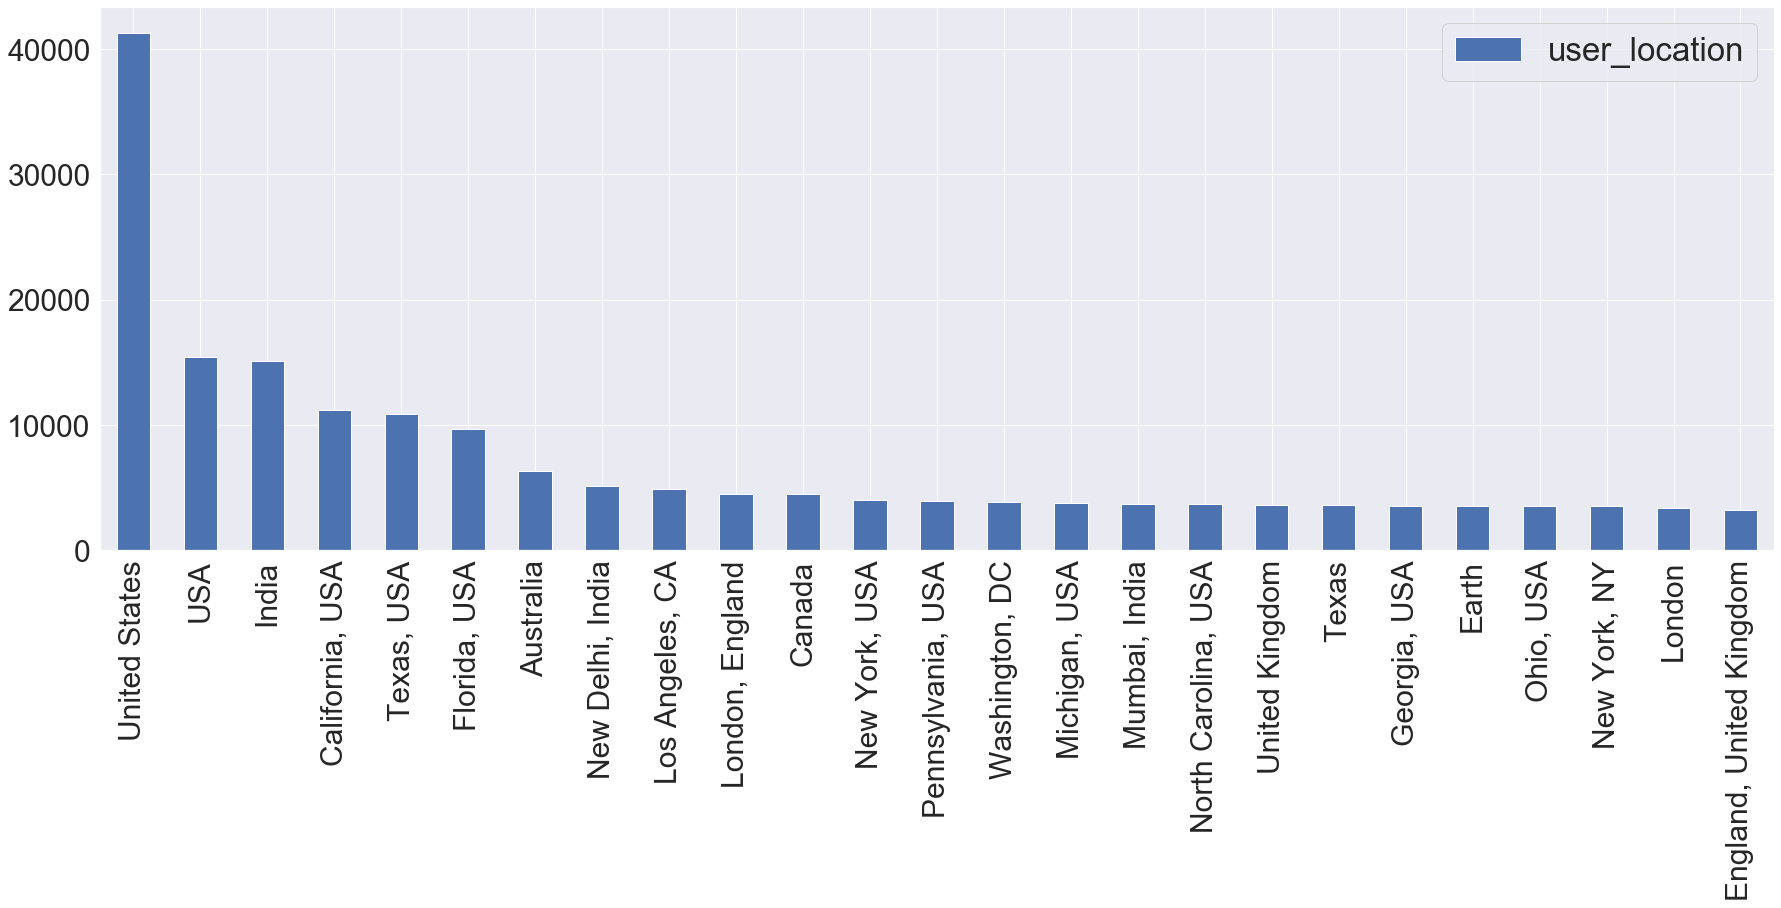

In [133]:
#Data visualization of user_location
#Observed that the majority of tweet publisher countries are US, India, and UK, but US accounts for a large part
%matplotlib inline
plt.figure(figsize=(30,10))
location_counts = data_01.user_location.value_counts()
location_counts[0:25].plot.bar(fontsize=30)
plt.legend()
plt.show()

In [134]:
data_01.head()

,tweet_id,tweet_lang,text,user_id,user_location,user_friends_count,user_favourites_count,user_followers_count,weekday,date,swearword,score,Very positive,Positive,Neutral,Very negative,Negative,url
0,1215055926136377349,en,RT @cjtruth: Do not force those not yet ready....,96691465,United States,1465,27440,594,Wed,2020-01-08 23:41:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1215055926958481413,en,RT @weightman_gary3: They are LOL closing in o...,859592034,"New Hampshire, USA",55470,64401,55298,Wed,2020-01-08 23:41:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1215055927264436224,en,RT @Louis_Allday: Anyone who is surprised that...,800159623617490944,she/her,104,50239,88,Wed,2020-01-08 23:41:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1215055922948530179,en,@matthewfsmith Another propaganda from @matthe...,2515385400,Sydney,41,54,7,Wed,2020-01-08 23:41:21,NaN,1.0,0.007848,0.023788,0.245662,0.10192,0.620782,https://twitter.com/i/web/status/1215055922948...
4,1215055922634141697,en,RT @catturd2: Good morning to everyone except ...,3041722431,NaN,2578,49762,2290,Wed,2020-01-08 23:41:21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


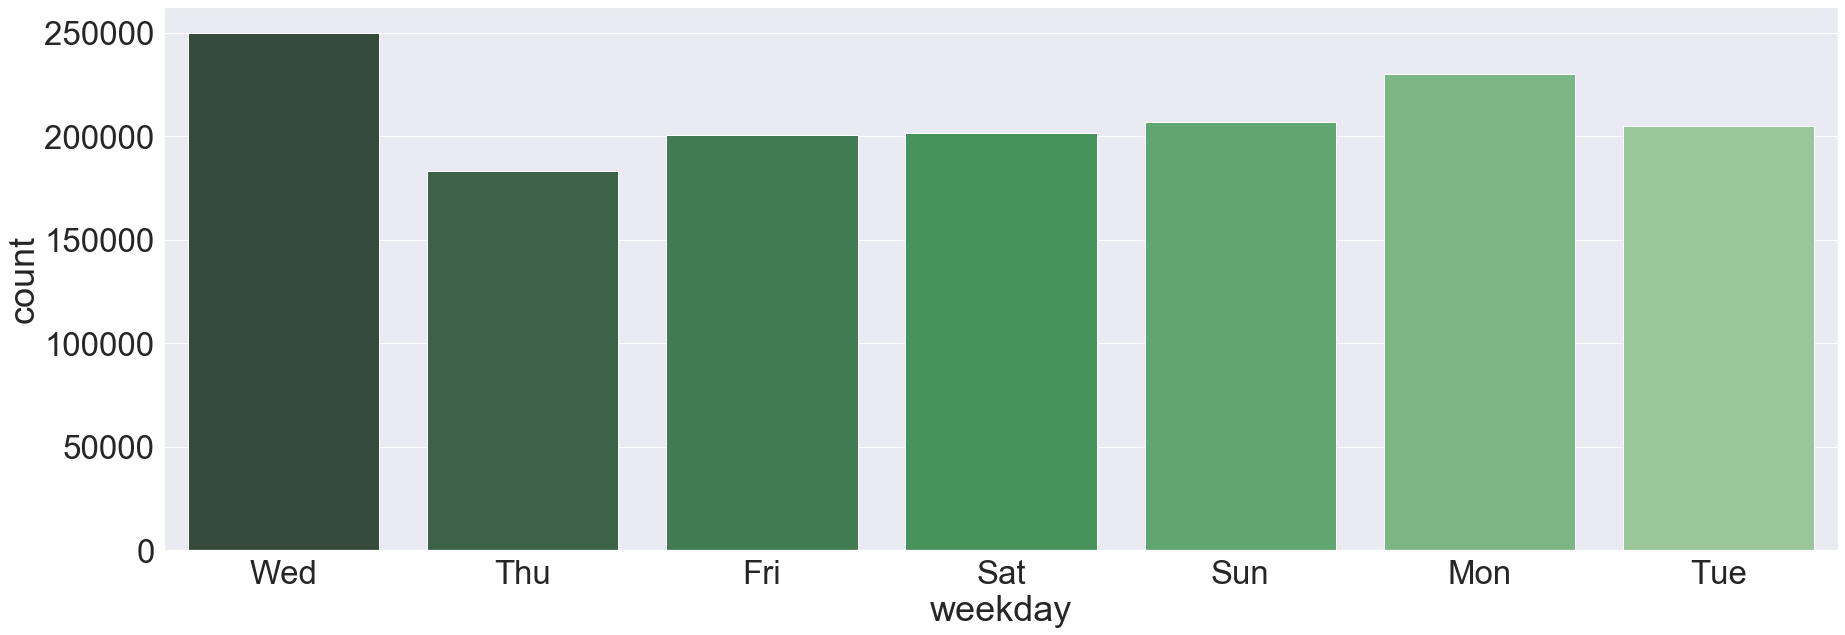

In [135]:
#Visualize the time published by tweet
#Wednesday with the most data is because there is a two-week Wednesday for the date of dataset, so there are more data samples.
#Post tweets on weekends a little more than weekdays
%matplotlib inline
plt.figure(figsize=(30,10))
# data_03_04.weekday.value_counts().plot.bar(fontsize=30)
# plt.show()
sns.set(font_scale=3)
sns.countplot(x='weekday', data=data_01, palette="Greens_d")
plt.show()

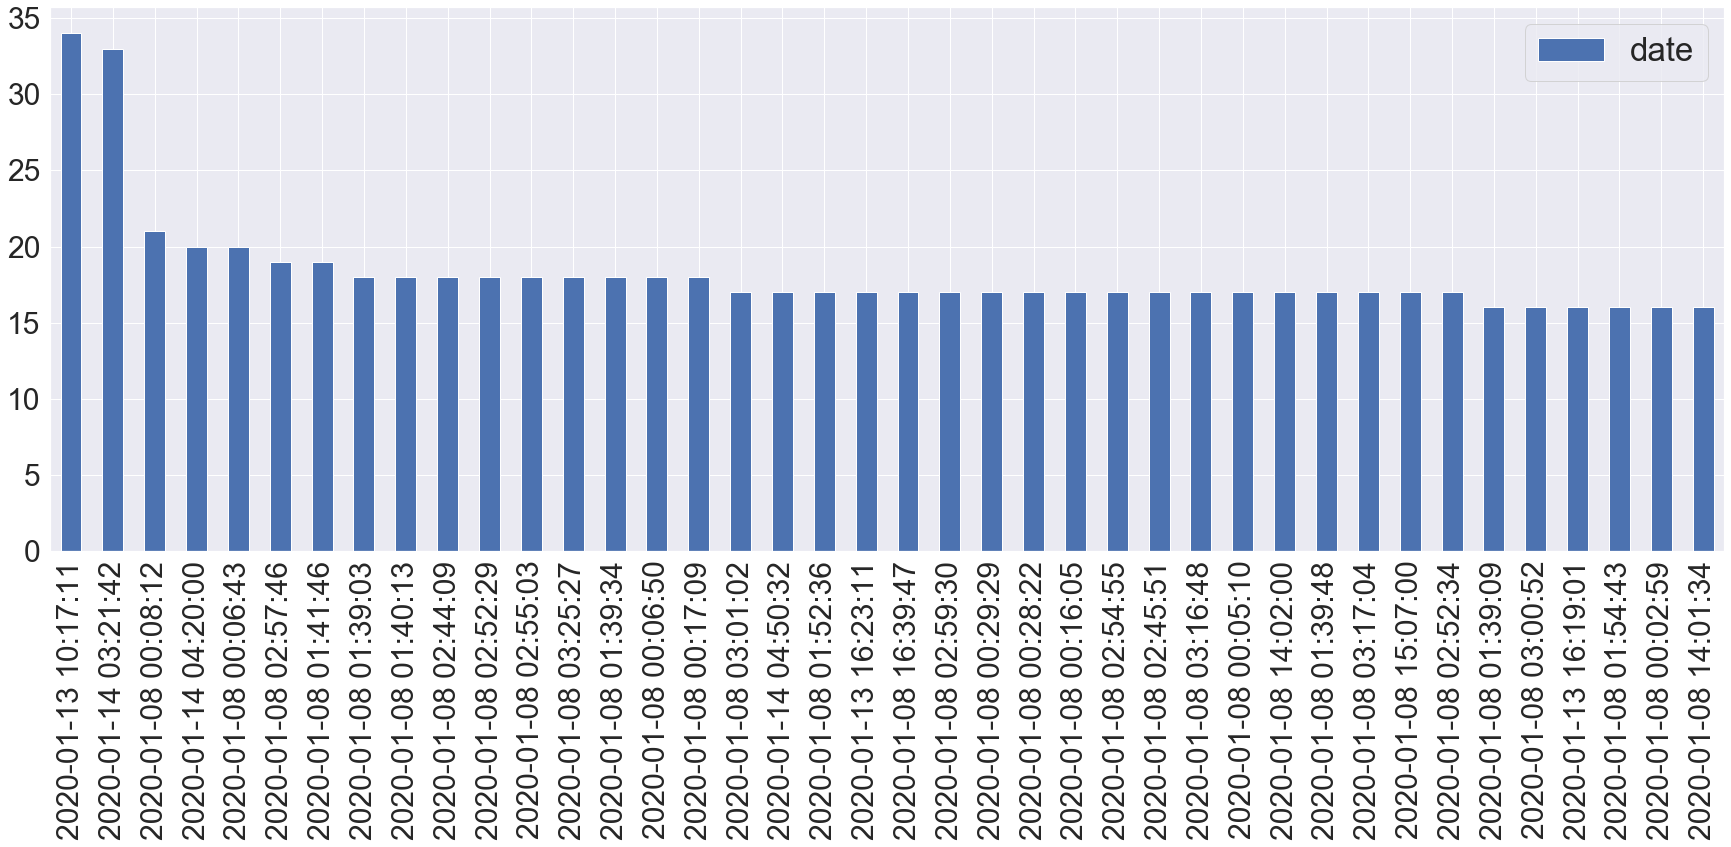

In [136]:
#Found that most tweets are released around 9pm
time_counts = data_01.date.value_counts()
plt.figure(figsize=(30,10))
time_counts[0:40].plot.bar(fontsize=30)
plt.legend()
plt.show()

In [137]:
#The number represents the emotional bias of the tweet, and the smaller the number, the more negative the emotion
data_01.score.value_counts()

1.0    307189
2.0     33527
3.0      8897
0.0      3724
4.0       100
Name: score, dtype: int64

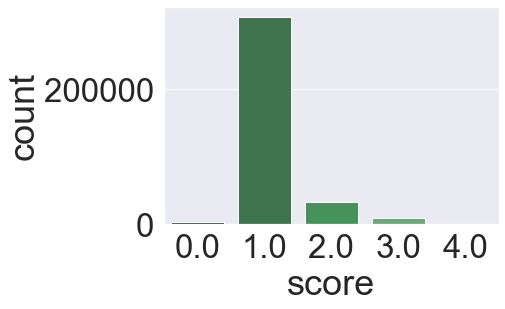

In [139]:
sns.countplot(x='score', data=data_01, palette="Greens_d")
plt.show()

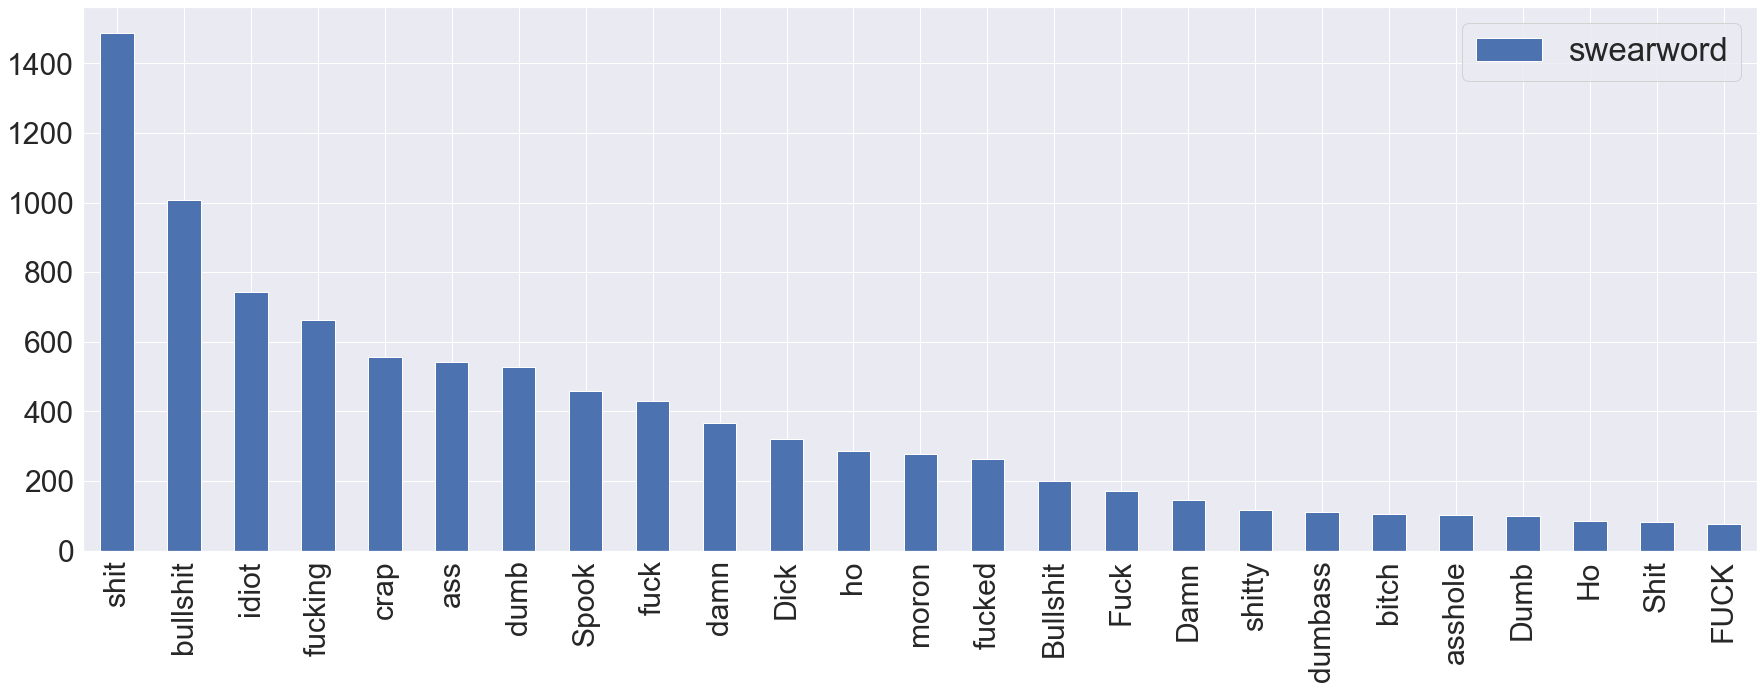

In [140]:
#Statistics about negative words in swearword
plt.figure(figsize=(30,10))
swearword_counts = data_01.swearword.value_counts()
swearword_counts[0:25].plot.bar(fontsize=30)
plt.legend()
plt.show()

In [141]:
#Sorting and data visualization of users with a relatively large number of tweets
users = data_01.user_id.value_counts()
users[0:20]

886721547481874432     630
701867849707601921     550
629196051              414
840496870875045889     409
707771294024994818     327
3580248555             315
939209002357067778     252
23291026               247
876449009728180224     221
553668770              211
1182820646             201
700386430510497792     200
2853443310             195
939024314              195
4234882707             191
29067876               190
1111275109136957440    181
1200668568691412993    177
705770005636321280     176
1190305524056592384    169
Name: user_id, dtype: int64

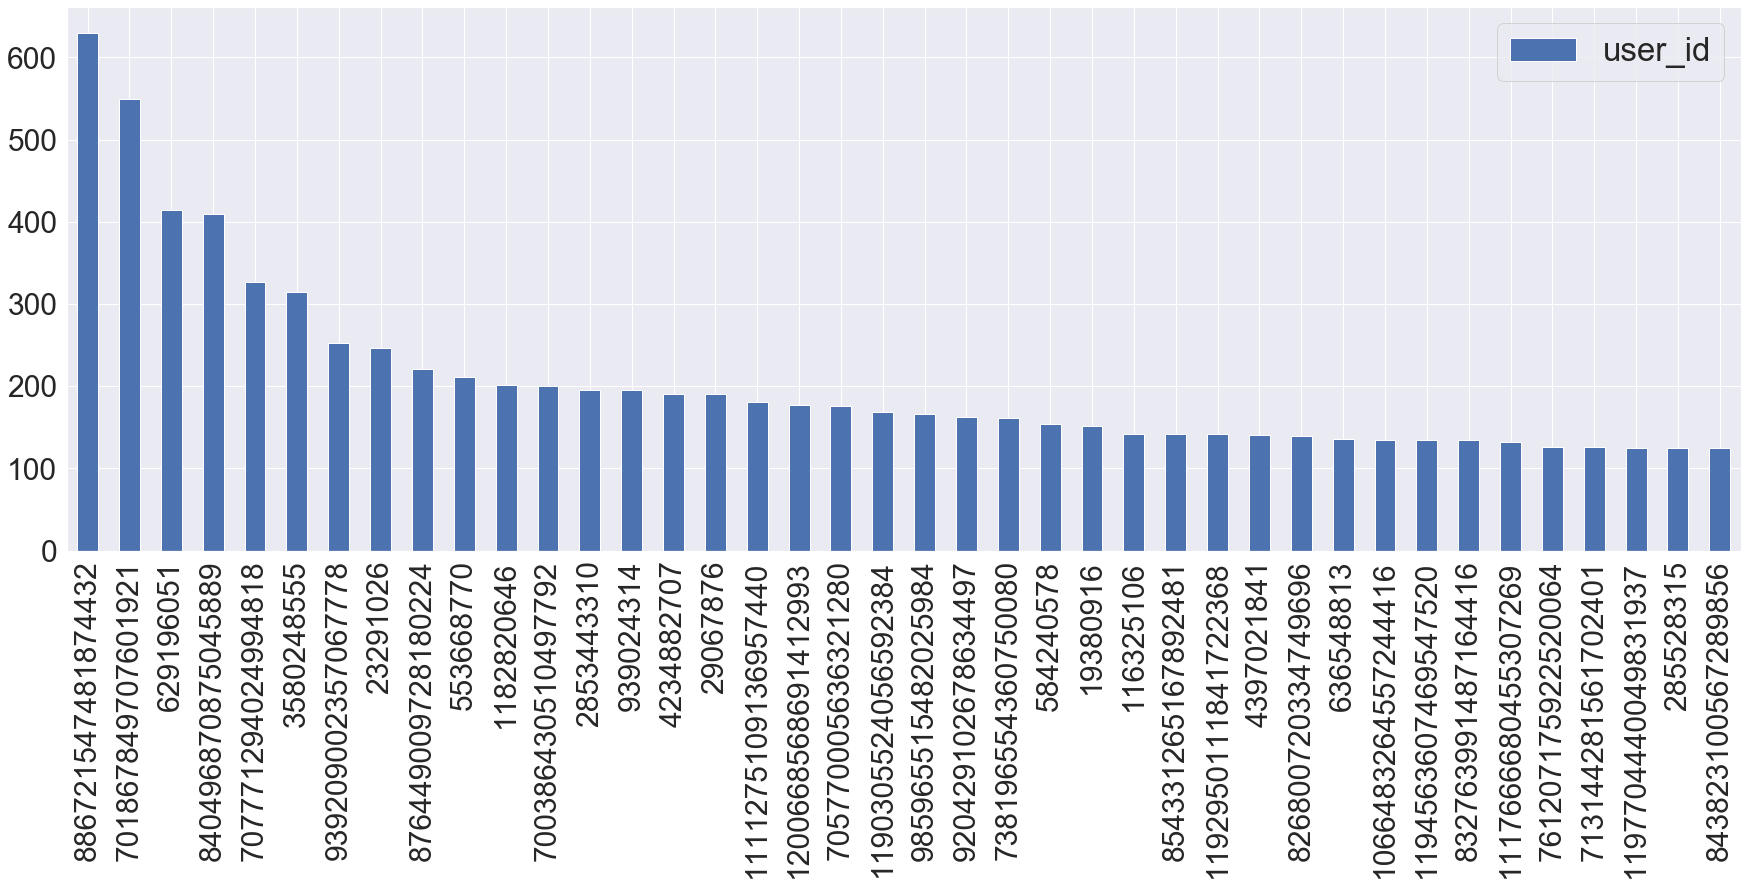

In [142]:
plt.figure(figsize=(30,10))
users[0:40].plot.bar(fontsize=30)
plt.legend()
plt.show()

In [143]:
#Collect data about usersinfo
userinfo = data_01[['user_id','user_location','user_friends_count','user_favourites_count','user_followers_count']].sort_values('user_followers_count',ascending = False)

In [144]:
userinfo[0:20]

,user_id,user_location,user_friends_count,user_favourites_count,user_followers_count
1223173,25365536,,131,159,62980912
1381892,807095,New York City,899,18411,44887707
1082056,759251,NaN,1107,1434,44317721
866940,759251,NaN,1107,1434,44294792
548659,759251,NaN,1107,1434,44236360
880447,1652541,Around the world,1110,750,21081475
399411,1652541,Around the world,1109,751,21061917
395603,1652541,Around the world,1109,751,21061829
169530,3108351,"New York, NY",1120,1201,17141311
994697,91478624,"New York, NY",5322,10320,15747468


# Step-4 Separate storage and processing of text data
1.Save the data after  Pre-processing as a file

2.Text processing in pandas dataset

3.After processing, the old text data CSV file is overwritten（Avoid repeated operations when opening the file next time）

In [24]:
#read tweet data csv file
data_01 = pd.read_csv('data_01.csv')
data_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477485 entries, 0 to 1477484
Data columns (total 18 columns):
tweet_id                 1477485 non-null int64
tweet_lang               1477485 non-null object
text                     1477485 non-null object
user_id                  1477485 non-null int64
user_location            938644 non-null object
user_friends_count       1477485 non-null int64
user_favourites_count    1477485 non-null int64
user_followers_count     1477485 non-null int64
weekday                  1477485 non-null object
date                     1477485 non-null object
swearword                11795 non-null object
score                    353437 non-null float64
Very positive            353437 non-null float64
Positive                 353437 non-null float64
Neutral                  353437 non-null float64
Very negative            353437 non-null float64
Negative                 353437 non-null float64
url                      353437 non-null object
dtypes: float6

In [25]:
data_01.head(2)

,tweet_id,tweet_lang,text,user_id,user_location,user_friends_count,user_favourites_count,user_followers_count,weekday,date,swearword,score,Very positive,Positive,Neutral,Very negative,Negative,url
0,1215055926136377349,en,RT @cjtruth: Do not force those not yet ready....,96691465,United States,1465,27440,594,Wed,2020-01-08 23:41:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1215055926958481413,en,RT @weightman_gary3: They are LOL closing in o...,859592034,"New Hampshire, USA",55470,64401,55298,Wed,2020-01-08 23:41:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
text_01 = data_01[['tweet_id','text']]

In [29]:
text_01.head(2)

,tweet_id,text
0,1215055926136377349,RT @cjtruth: Do not force those not yet ready....
1,1215055926958481413,RT @weightman_gary3: They are LOL closing in o...


In [30]:
# Count characters
text_01['word_count'] = text_01['text'].apply(lambda x:len(x.split(' ')))
text_01[['text','word_count']].head()

,text,word_count
0,RT @cjtruth: Do not force those not yet ready....,22
1,RT @weightman_gary3: They are LOL closing in o...,23
2,RT @Louis_Allday: Anyone who is surprised that...,22
3,@matthewfsmith Another propaganda from @matthe...,31
4,RT @catturd2: Good morning to everyone except ...,20


In [31]:
# Statistical stop words
from nltk.corpus import stopwords
stop=stopwords.words('english')
text_01['stopwords']=text_01['text'].apply(lambda sen:len([x for x in sen.split() if x in stop]))
text_01[['text','stopwords']].head()

,text,stopwords
0,RT @cjtruth: Do not force those not yet ready....,8
1,RT @weightman_gary3: They are LOL closing in o...,6
2,RT @Louis_Allday: Anyone who is surprised that...,8
3,@matthewfsmith Another propaganda from @matthe...,8
4,RT @catturd2: Good morning to everyone except ...,3


In [32]:
text_01.head()

,tweet_id,text,word_count,stopwords
0,1215055926136377349,RT @cjtruth: Do not force those not yet ready....,22,8
1,1215055926958481413,RT @weightman_gary3: They are LOL closing in o...,23,6
2,1215055927264436224,RT @Louis_Allday: Anyone who is surprised that...,22,8
3,1215055922948530179,@matthewfsmith Another propaganda from @matthe...,31,8
4,1215055922634141697,RT @catturd2: Good morning to everyone except ...,20,3


In [33]:
#Save these textinfo statistics as a csv file
text_01.to_csv('text_01.csv',index=False)

# The processing of tweet text data includes：
1.the conversion of lowercase letters

2.deletion of @user and RT from each tweet

3.deletion of words with a length of less than 3

4.Delete punctuation

5.removal of stop words

6.The part of speech reduction 

7.word segmentation and Part-of-speech tagging

In [112]:
#Read the Tweet Text data again
os.chdir(r'D:\dataset\clear_data')
text_01 = pd.read_csv('text_01.csv')
text_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477485 entries, 0 to 1477484
Data columns (total 4 columns):
tweet_id      1477485 non-null int64
text          1477485 non-null object
word_count    1477485 non-null int64
stopwords     1477485 non-null int64
dtypes: int64(3), object(1)
memory usage: 45.1+ MB


In [113]:
len(text_01)

1477485

In [114]:
# Filter out some useless handles
import re
reg_map = {
    re.compile("rt [@0-9a-z_]{0,10}:"),
    re.compile("[a-zA-z]+://[^\s]*"),
    re.compile('http|htttps…'),
    re.compile('[a-z]*[:.]+\S+'),
    re.compile("@[0-9a-z]+"),
    re.compile("RT[\s]+"),
    re.compile("#"),
    re.compile('https?:\/\/\S+'),
}
def lower_and_remove_with_reg(text: str) -> str:
    text = text.lower()
    for v in reg_map:
        text = v.sub("", text)
    return text

In [115]:
# Filter out some useless handles
text_01['text']=text_01['text'].apply(lower_and_remove_with_reg)
text_01['text'].head()

0     do not force those not yet ready.\nthe fake n...
1    rt _gary3: they are lol closing in on krugman!...
2    rt _allday: anyone who is surprised that ilhan...
3     another propaganda from   and so called human...
4     good morning to everyone except nbc who gladl...
Name: text, dtype: object

In [118]:
text_01_http = text_01[text_01.text.str.contains(r'http')]
len(text_01_http)

0

In [119]:
# replaces periods with Spaces
text_01['text'] = text_01['text'].str.replace('[^a-zA-Z]', ' ') 
text_01['text'].head()

0     do not force those not yet ready  the fake ne...
1    rt  gary   they are lol closing in on krugman ...
2    rt  allday  anyone who is surprised that ilhan...
3     another propaganda from   and so called human...
4     good morning to everyone except nbc who gladl...
Name: text, dtype: object

In [120]:
#Delete the short term
text_01['text']=text_01['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
text_01['text'].head()

0    force those ready fake news narrative make bel...
1    gary they closing krugman fake news wants beli...
2    allday anyone surprised that ilhan omar sharin...
3    another propaganda from called human rights gr...
4    good morning everyone except gladly spread ira...
Name: text, dtype: object

In [121]:
# Remove stop words
from nltk.corpus import stopwords
stop=stopwords.words('english')
text_01['text']=text_01['text'].apply(lambda sen:" ".join(x for x in sen.split() if x not in stop))
text_01['text'].head()

0    force ready fake news narrative make believe i...
1    gary closing krugman fake news wants believe b...
2    allday anyone surprised ilhan omar sharing bra...
3    another propaganda called human rights group a...
4    good morning everyone except gladly spread ira...
Name: text, dtype: object

In [122]:
# #词干提取
# from nltk.stem import PorterStemmer
# st=PorterStemmer()
# text_03_04['text'] = text_03_04['text'].apply(lambda x:" ".join([st.stem(word) for word in x.split()]))
# text_03_04['text'].head()

In [123]:
#Part of speech reduction
from textblob import Word
text_01['text'] = text_01['text'].apply(lambda x:" ".join([Word(word).lemmatize() for word in x.split()]))
text_01['text'].head()

0    force ready fake news narrative make believe i...
1    gary closing krugman fake news want believe bo...
2    allday anyone surprised ilhan omar sharing bra...
3    another propaganda called human right group al...
4    good morning everyone except gladly spread ira...
Name: text, dtype: object

In [124]:
#Delete handle
#Participle
from nltk.tokenize import TweetTokenizer
from nltk import pos_tag
tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)
text_01['word']=text_01['text'].apply(tknzr.tokenize)
text_01['word'].head()

0    [force, ready, fake, news, narrative, make, be...
1    [gary, closing, krugman, fake, news, want, bel...
2    [allday, anyone, surprised, ilhan, omar, shari...
3    [another, propaganda, called, human, right, gr...
4    [good, morning, everyone, except, gladly, spre...
Name: word, dtype: object

In [125]:
# Part-of-speech tagging
from nltk import pos_tag
from nltk import word_tokenize
def get_pos(text):
    token = word_tokenize(text)
    word = (pos_tag(token))
    return word

In [126]:
text_01['text_tag']=text_01['text'].apply(get_pos)
text_01.head()

,tweet_id,text,word_count,stopwords,word,text_tag
0,1215055926136377349,force ready fake news narrative make believe i...,22,8,"[force, ready, fake, news, narrative, make, be...","[(force, NN), (ready, JJ), (fake, JJ), (news, ..."
1,1215055926958481413,gary closing krugman fake news want believe bo...,23,6,"[gary, closing, krugman, fake, news, want, bel...","[(gary, JJ), (closing, NN), (krugman, NN), (fa..."
2,1215055927264436224,allday anyone surprised ilhan omar sharing bra...,22,8,"[allday, anyone, surprised, ilhan, omar, shari...","[(allday, RB), (anyone, NN), (surprised, VBD),..."
3,1215055922948530179,another propaganda called human right group al...,31,8,"[another, propaganda, called, human, right, gr...","[(another, DT), (propaganda, NN), (called, VBN..."
4,1215055922634141697,good morning everyone except gladly spread ira...,20,3,"[good, morning, everyone, except, gladly, spre...","[(good, JJ), (morning, NN), (everyone, NN), (e..."


In [127]:
#save the text mining data as a new csv file
text_01.to_csv('text_01_mining.csv',index=False)

In [128]:
#Read the CSV file again for check 
text_01 = pd.read_csv('text_01_mining.csv')
text_01.head()

,tweet_id,text,word_count,stopwords,word,text_tag
0,1215055926136377349,force ready fake news narrative make believe i...,22,8,"['force', 'ready', 'fake', 'news', 'narrative'...","[('force', 'NN'), ('ready', 'JJ'), ('fake', 'J..."
1,1215055926958481413,gary closing krugman fake news want believe bo...,23,6,"['gary', 'closing', 'krugman', 'fake', 'news',...","[('gary', 'JJ'), ('closing', 'NN'), ('krugman'..."
2,1215055927264436224,allday anyone surprised ilhan omar sharing bra...,22,8,"['allday', 'anyone', 'surprised', 'ilhan', 'om...","[('allday', 'RB'), ('anyone', 'NN'), ('surpris..."
3,1215055922948530179,another propaganda called human right group al...,31,8,"['another', 'propaganda', 'called', 'human', '...","[('another', 'DT'), ('propaganda', 'NN'), ('ca..."
4,1215055922634141697,good morning everyone except gladly spread ira...,20,3,"['good', 'morning', 'everyone', 'except', 'gla...","[('good', 'JJ'), ('morning', 'NN'), ('everyone..."
